In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [360]:
#upload file
df=pd.read_csv("IPL_2023-22_Sold_Players.csv")
print(df.head())

   Season             Name Nationality          Type                  Team  \
0    2023  Ajinkya Rahane      Indian        Batter    Chennai Super Kings   
1    2023   Bhagath Varma      Indian   All-Rounder    Chennai Super Kings   
2    2023   Kyle Jamieson    Overseas        Bowler    Chennai Super Kings   
3    2023     Ajay Mandal      Indian   All-Rounder    Chennai Super Kings   
4    2023  Nishant Sindhu      Indian   All-Rounder    Chennai Super Kings   

          Price  
0    50,00,000   
1    20,00,000   
2  1,00,00,000   
3    20,00,000   
4    60,00,000   


In [361]:
#show total number of columns
print(df.columns)

Index(['Season', 'Name', 'Nationality', 'Type', 'Team', 'Price'], dtype='object')


## Show unique columns

In [362]:
#show unique values in the row
df.Nationality.unique()

array(['Indian ', 'Overseas '], dtype=object)

In [363]:
#show unique values in the row
df.Team.unique()

array([' Chennai Super Kings', ' Delhi Capitals', ' Gujarat Titans',
       ' Kolkata Knight Riders', ' Lucknow Super Giants',
       ' Mumbai Indians', ' Punjab Kings', ' Rajasthan Royals',
       ' Royal Challengers Bangalore', ' Sunrisers Hyderabad'],
      dtype=object)

In [364]:
#show unique values in the row
df.Type.unique()

array(['Batter ', 'All-Rounder ', 'Bowler ', 'Wicket-Keeper ', 'Batsman ',
       'Wicket Keeper '], dtype=object)

## Replacing different same name to unique name and remove extra spaces from "Type" Columns

In [365]:
# Romove white-spaces
df["Team"]=df["Team"].str.strip()

In [366]:
print(df["Team"].unique())

['Chennai Super Kings' 'Delhi Capitals' 'Gujarat Titans'
 'Kolkata Knight Riders' 'Lucknow Super Giants' 'Mumbai Indians'
 'Punjab Kings' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [367]:
#Replacing different same name to unique name
df["Type"]=df["Type"].replace('Batter ','Batsman')
df["Type"]=df["Type"].replace('Batsman ','Batsman')
df["Type"]=df["Type"].replace('All-Rounder ','All-Rounder')
df["Type"]=df["Type"].replace('Bowler ','Bowler')
df["Type"]=df["Type"].replace('Wicket-Keeper ','Wicket-Keeper')
df["Type"]=df["Type"].replace('Wicket Keeper ','Wicket-Keeper')

In [368]:
df.Type.unique()

array(['Batsman', 'All-Rounder', 'Bowler', 'Wicket-Keeper'], dtype=object)

## Check duplicates values

In [369]:
df.duplicated().sum()

0

In [370]:
df['Team'].isna().sum()

0

In [371]:
df['Nationality'].isna().sum()

0

In [372]:
df['Type'].value_counts()

All-Rounder      106
Bowler            96
Batsman           48
Wicket-Keeper     34
Name: Type, dtype: int64

In [373]:
for c in df.columns:
    print(f"Total number of null values in column {c} : {df[c].isnull().sum()}")

Total number of null values in column Season : 0
Total number of null values in column Name : 0
Total number of null values in column Nationality : 0
Total number of null values in column Type : 0
Total number of null values in column Team : 0
Total number of null values in column Price : 0


In [374]:
print(df.dtypes)

Season          int64
Name           object
Nationality    object
Type           object
Team           object
Price          object
dtype: object


## Convert Price column's datatype into integer

In [375]:
print(df.Price.head())

0      50,00,000 
1      20,00,000 
2    1,00,00,000 
3      20,00,000 
4      60,00,000 
Name: Price, dtype: object


In [376]:
df['Price']=df['Price'].apply(lambda x: str(x).replace(',','')).astype('int')

In [377]:
print(df.head())

   Season             Name Nationality         Type                 Team  \
0    2023  Ajinkya Rahane      Indian       Batsman  Chennai Super Kings   
1    2023   Bhagath Varma      Indian   All-Rounder  Chennai Super Kings   
2    2023   Kyle Jamieson    Overseas        Bowler  Chennai Super Kings   
3    2023     Ajay Mandal      Indian   All-Rounder  Chennai Super Kings   
4    2023  Nishant Sindhu      Indian   All-Rounder  Chennai Super Kings   

      Price  
0   5000000  
1   2000000  
2  10000000  
3   2000000  
4   6000000  


## Create function to short the team name

In [378]:
# First Method
list_name=[]
for n in name:
    shortname=n[0]
    for i in range(len(n)-1):
        if(n[i]==" "):
            shortname=shortname+n[i+1]
    list_name.append(shortname)
print(list_name)

['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PK', 'RR', 'RCB', 'SH']


In [379]:
#second Method
def short_name(name):
    
    list_name=[]
    for n in name:
        shortname=""
        l=n.split(" ")
        for i in range(len(l)):
            shortname=shortname+l[i][0]
        list_name.append(shortname)
    return list_name


### Call short_name function for make a new column to covert Team name to short name

In [380]:
df["Team Name"]=short_name(df["Team"])

In [381]:
print(df.head())

   Season             Name Nationality         Type                 Team  \
0    2023  Ajinkya Rahane      Indian       Batsman  Chennai Super Kings   
1    2023   Bhagath Varma      Indian   All-Rounder  Chennai Super Kings   
2    2023   Kyle Jamieson    Overseas        Bowler  Chennai Super Kings   
3    2023     Ajay Mandal      Indian   All-Rounder  Chennai Super Kings   
4    2023  Nishant Sindhu      Indian   All-Rounder  Chennai Super Kings   

      Price Team Name  
0   5000000       CSK  
1   2000000       CSK  
2  10000000       CSK  
3   2000000       CSK  
4   6000000       CSK  


# Data Visualization

## 1 :  More money has been spent in buying which type of players

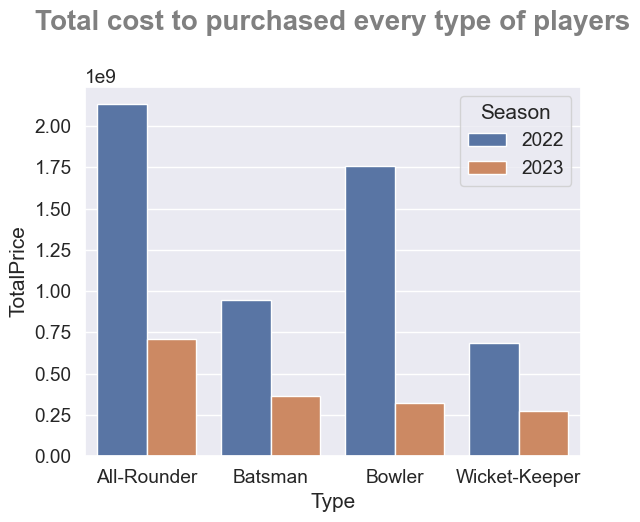

In [382]:
ndf=df.groupby(["Type","Season"]).agg(
TotalPrice=("Price","sum")
).reset_index()
sea.barplot(data=ndf, x=ndf["Type"], y=ndf["TotalPrice"], hue=ndf["Season"]).set_title("Total cost to purchased every type of players\n",fontdict={'size':20, 'weight':"bold", "color":"grey"})
sea.set(font_scale=1.25)

#### Conclusion : Every year more money is spend to buy all-rounder players and 2022 is more expensive year than 2023

## 2 : Nationality of the player with repect to player's Price?

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Nationality wise players Sold \n')

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


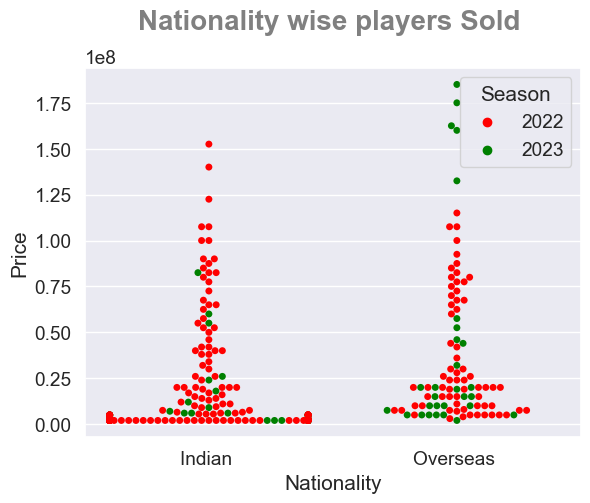

In [383]:
sea.swarmplot(data=df, x=df["Nationality"], y=df["Price"], hue=df.Season , palette=["red","green"]).set_title("Nationality wise players Sold \n",fontdict={'size':20, 'weight':"bold", "color":"grey"})

####  Conclusion : in 2022, India purchased costly players but in 2023, overseas had over taken

## 3 :  Which team has focued more on which type of players

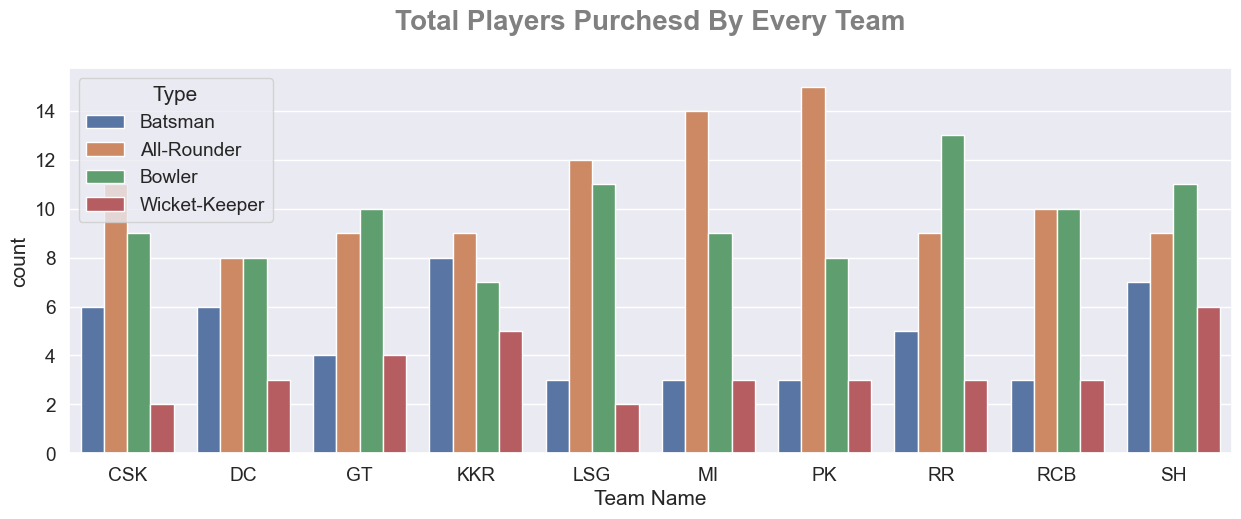

In [384]:
fig, ax = plt.subplots(figsize=(15, 5))
sea.countplot(data=df, x=df["Team Name"],hue=df["Type"],ax=ax).set_title("Total Players Purchesd By Every Team\n",fontdict={'size':20, 'weight':"bold", "color":"grey"})
#plt.xticks(rotation=90)
sea.set(font_scale=1)

#### Conclusion : Every Team has spend more money on puchased "All Rounder"Players but "Rajasthan Royal" and "Gujarat Titans" has spend more money on bowlers  

### Season wise sold types of players by every team

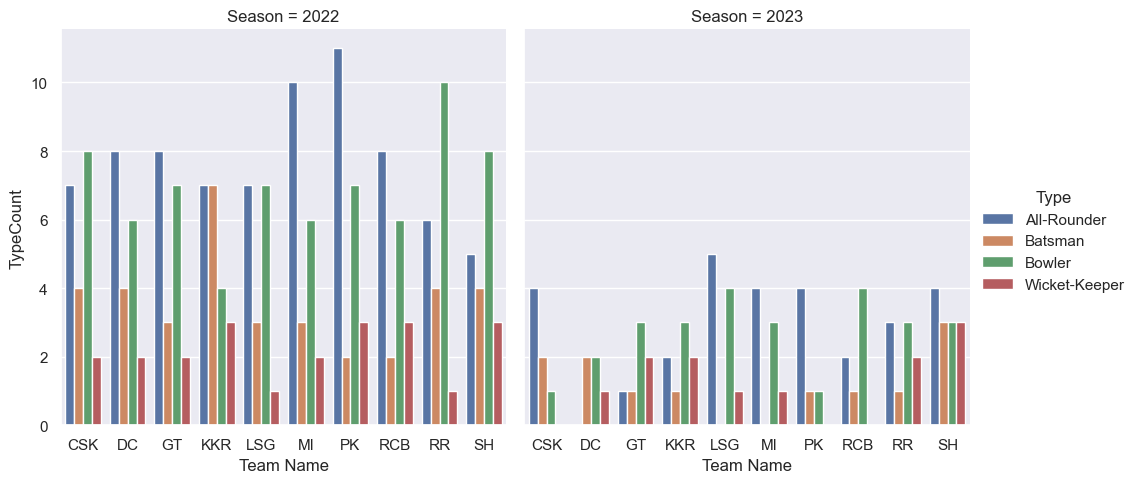

In [385]:
ndf=df.groupby(["Season","Team Name","Type"]).agg(
TypeCount=("Type","count")
).reset_index()
sea.catplot(data=ndf,x="Team Name",y="TypeCount",hue="Type",col="Season", kind="bar")
sea.set(font_scale=1.25)
#plt.xticks(rotation=25)

####  Conclusion :  in 2022, Teams was purchsed more palyers than 2023.

## 4 : Number of types of players sold players by teams

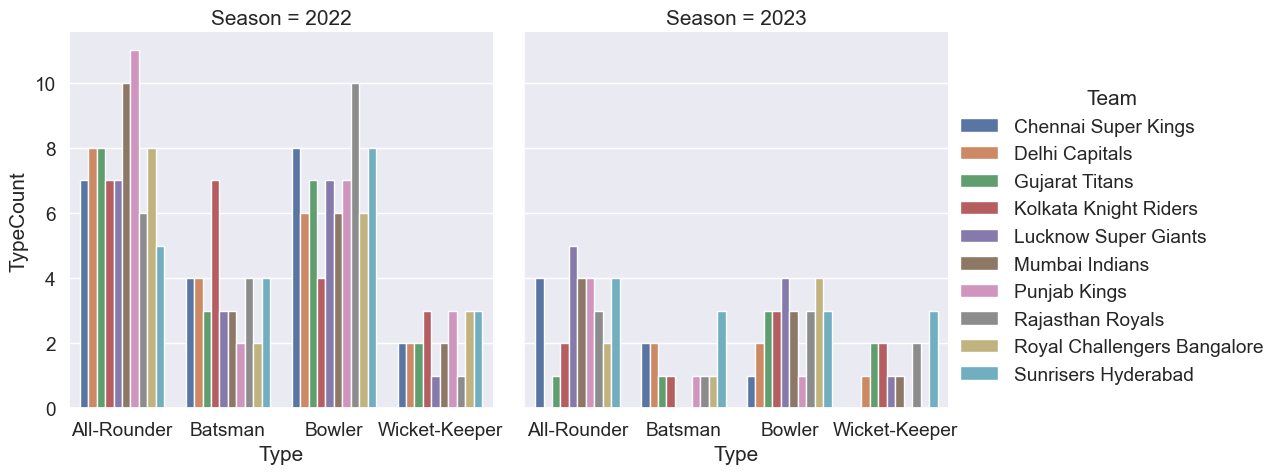

In [386]:
ndf=df.groupby(["Season","Team","Type"]).agg(
TypeCount=("Type","count")
).reset_index()
sea.catplot(data=ndf,x="Type",y="TypeCount",hue="Team",col="Season", kind="bar")
sea.set(font_scale=1.25)

#### Conclusion : in 2023, Lucknow Super Giants and mumbai are not purchased batsman. They are focused on all-rounder and bowlers so they buy the most all-aounder and bowlers players. Punjab Kings and Royal CHallengers Banglore are not bought wicket-keeper

## 4 : Which year the teams spent most money

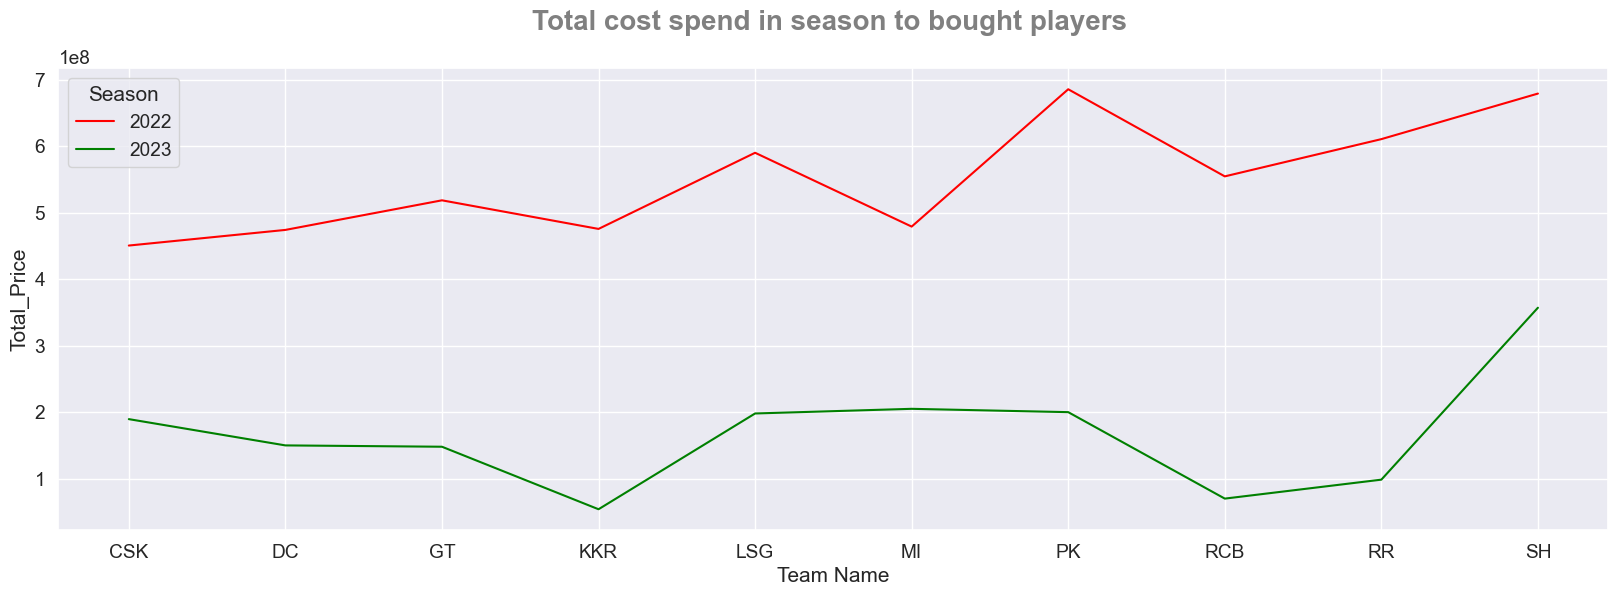

In [387]:
ndf=df.groupby(["Team Name","Season"]).agg(
Total_Price=("Price","sum")
).reset_index()
plt.subplots(figsize=(20,6))
sea.lineplot(data=ndf,x="Team Name", y="Total_Price", markers=True, hue="Season", palette=["red","green"]).set_title("Total cost spend in season to bought players \n",fontdict={'size':20, 'weight':"bold", "color":"grey"})
sea.set(font_scale=1.25)

#### Conclusion : 2022 is more expensive year than 2023

## 5 : Which nationality players are most sold

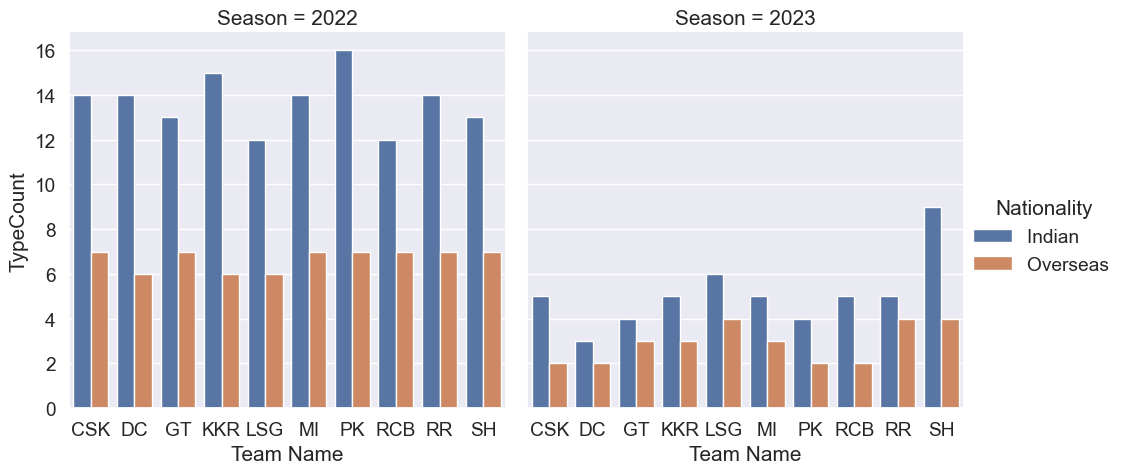

In [388]:
ndf=df.groupby(["Season","Team Name","Nationality"]).agg(
TypeCount=("Nationality","count")
).reset_index()
sea.catplot(data=ndf,x="Team Name",y="TypeCount",hue="Nationality",col="Season", kind="bar")
sea.set(font_scale=1.25)

####  Conclusion :  Indian players are more sold as compare to overseas players

## Top 5 costly players

### Top 5 costly Player in 2022

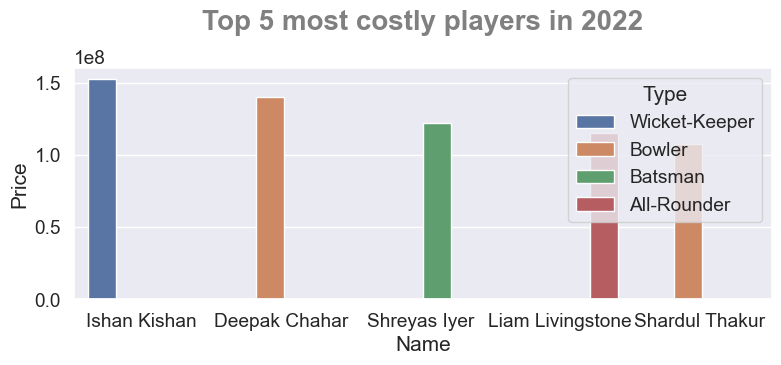

In [389]:
exp_player_df=df.loc[df.Season==2022].sort_values(["Price"],ascending=False).head()
fig, ax = plt.subplots(figsize=(9,3))
sea.barplot(data=exp_player_df,x="Name",y="Price",hue="Type",ax=ax).set_title("Top 5 most costly players in 2022\n",fontdict={'size':20, 'weight':"bold", "color":"grey"})
sea.set(font_scale=1.25)

### Top 5 Players in 2023

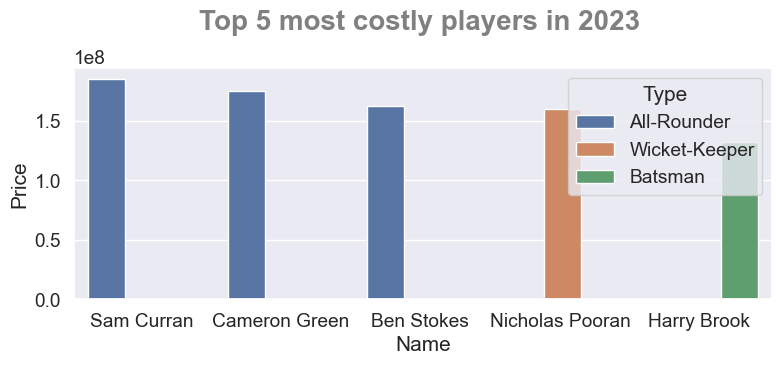

In [390]:
exp_player_df=df.loc[df.Season==2023].sort_values(["Price"],ascending=False).head()

fig, ax = plt.subplots(figsize=(9,3))
sea.barplot(data=exp_player_df,x="Name",y="Price",hue="Type",ax=ax).set_title("Top 5 most costly players in 2023 \n",fontdict={'size':20, 'weight':"bold", "color":"grey"})
sea.set(font_scale=1.25)

### Overall Top 5 players in 2022-23

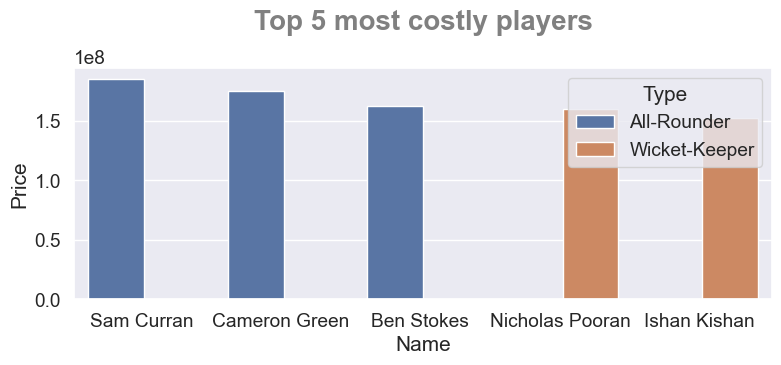

In [391]:
fig, ax = plt.subplots(figsize=(9,3))
exp_player_df=df.sort_values(["Price"],ascending=False).head()

sea.barplot(data=exp_player_df,x="Name",y="Price",hue="Type",ax=ax).set_title("Top 5 most costly players\n",fontdict={'size':20, 'weight':"bold", "color":"grey"})
sea.set(font_scale=1.25)

#### Conclusion :More player are sold in 2022 so more money spend in 2022 but most costly players in exist in 2023 which are all-rounder most